**Notebook Link**: https://colab.research.google.com/drive/1_J40DJjojM6_3xEybB8Nz3DBw3UJnA0N?usp=sharing


#<center>**Analysis of Airbnb Price prediction**#

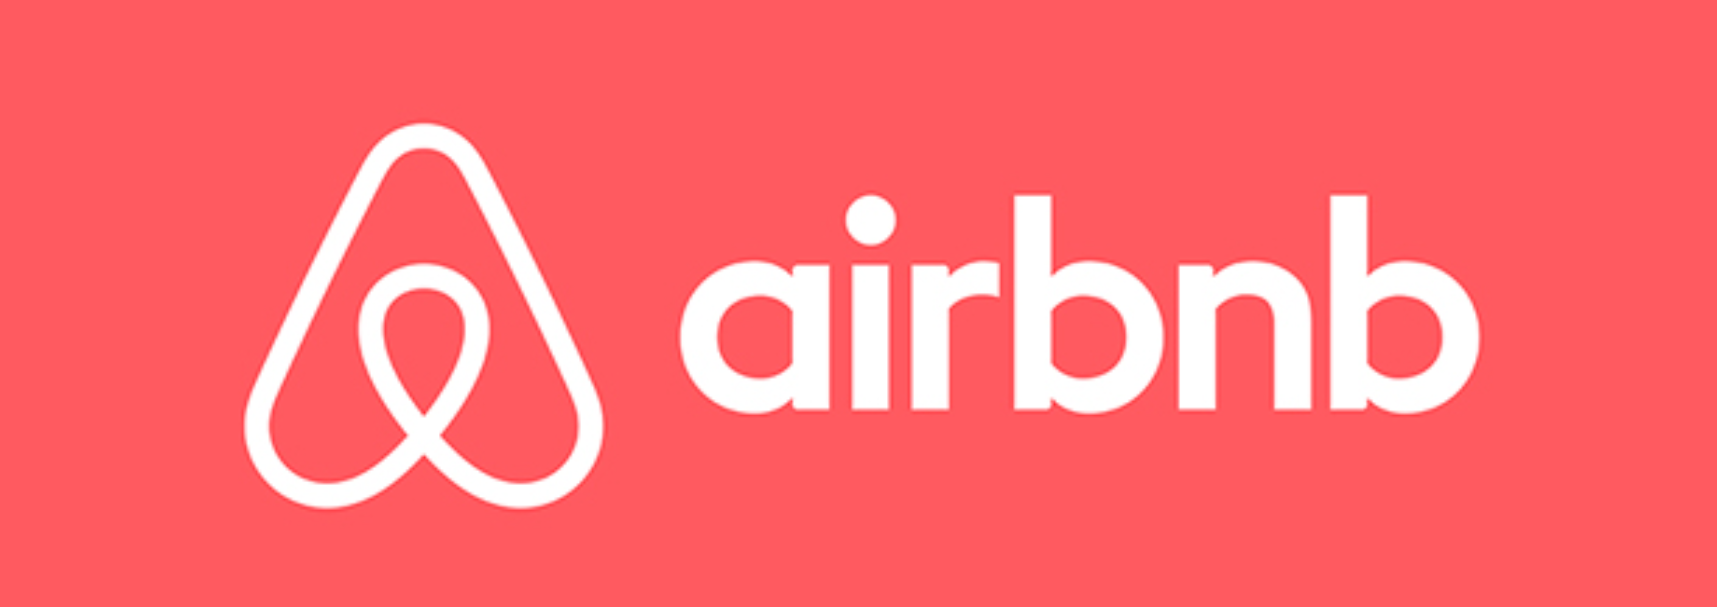


## <center>**Created by team 8: Raviv Zait, Cherish D'souza, Paulin Jesintha, Sohil Jain**

<hr>

###**Table of Contents**

_I. Project Overview_

_II. Data Wrangling_

> A. Import of Data
 
> B. Data Cleaning
 
> C. Data Modification
 
_III. Preprocessing for Machine Learning_

_IV. Feature Selection_

_V. Exploring feature selection using regularization_

_VI. Pipeline update for prediction models with reduced columns_

_VII. Prediction Models_

_VIII. Hyper Parameter Tuning_

_IX. Running the selected model on test data_

_X. Appendix - Feature Exploration_

_XI. Conclusion_

_XII. References_


<hr>

#Project Overview



As innovative technologies make travel more accessible to people, the hospitality industry is flourishing and expanding in new ways. Airbnb has defined itself to be one of the leaders in the industry, which allows hosts to list their properties on its platform for guests/travelers to stay. 

**Problem Statement**

Airbnb pricing proves to be of utmost importance, especially in a competitive market like New York, where slight changes in pricing can affect demand. 
Our main goal is to predict prices of the properties for Airbnb hosts in New York by analyzing key variables such as “neighborhood”, “reviews”, “room_type”, and “price”. 

This will aid Airbnb hosts in avoiding over-pricing (which might deter customers) and under-pricing (which might deter potential monetary benefits). To achieve this, we will be implementing an optimal machine-learning model to predict the price.

As the dataset holds significant number of columns, we will also be implementing feature selection to avoid over-fitting.

**About the Dataset**

The dataset originally contains 38,277 records and 74 columns. This dataset holds variables of various types including floats, objects and integers.Each of these columns are being explored in the project. The period observed in the dataset is the year - 2021 


**Data Source** - http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv

[If clicking the link doesn't download the file, copy it to a new tab.]

The dataset has been sourced from Insideairbnb.com


**Dataset Description:**

1. id - unique id for every listing
2. listing_url - link of the property                                   
3. scrape_id - id that extracts all host 
information                                    
4. last_scraped - latest date when host id was scrapped                                    
5. name - name of the property                                          
6. description -  description of the property                                  
7. neighborhood_overview - description of the neighborhood                        
8. picture_url - link to the pictures of the property                                   
9. host_id - unique id for every host                                  
10. host_url - link of the host on airbnb website                                     
11. host_name - name of the host                                    
12. host_since - date since host listed on airbnb                             
13. host_location - location of the host                                
14. host_about - brief description about the host                               
15. host_response_time - time taken for the host to respond                            
16. host_response_rate - the rate of host's responsiveness to their customers                           
17. host_acceptance_rate - the rate at which the host accepts the customer's request                           
18. host_is_superhost - whether the host is a superhost or not                            
19. host_thumbnail_url - link to host thumbnail                             
20. host_picture_url - link to the host's picture                              
21. host_neighbourhood - neighborhood of the host                           
22. host_listings_count - number of listings the host manages                          
23. host_total_listings_count -  total host listings                     
24. host_verifications - verified information of the host                            
25. host_has_profile_pic - whether the host has a profile picture or not                          
26. host_identity_verified - whether host identity is verified or not                         
27. neighbourhood - location with state and country                                 
28. neighbourhood_cleansed - exact area of the property in new york city                     
29. neighbourhood_group_cleansed - location of the property wihtout state and country                  
30. latitude - latitude of the property                                      
31. longitude - longitude of the property                                       
32. property_type - type of property                                  
33. room_type - type of room                                     
34. accommodates- number of people that the property accomodates                                  
35. bathrooms - number of bathrooms                                    
36. bathrooms_text - number of bathrooms with addditional text                                
37. bedrooms - number of bedrooms                                       
38. beds - number of beds                                           
39. amenities - list of amentities available at the property                                     
40. price - price per night                                          
41. minimum_nights - minimum number of nights a customer can rent the property for                                  
42. maximum_nights - maximum number of nights a customer can rent the property for                                  
43. minimum_minimum_nights - Duplicated values                    
44. maximum_minimum_nights  - Duplicated values                         
45. minimum_maximum_nights  - Duplicated values                         
46. maximum_maximum_nights  - Duplicated values                         
47. minimum_nights_avg_ntm  - Duplicated values                         
48. maximum_nights_avg_ntm   - Duplicated values                        
49. calendar_updated  - Duplicated values                               
50. has_availability - whether property is available or not                              
51. availability_30 - availability per 30 days                                
52. availability_60 - availability per 60 days                                
53. availability_90 - availability per 90 days                                
54. availability_365 - availability per 365 days                               
55. calendar_last_scraped   - Duplicated values                         
56. number_of_reviews - total number of reviews                               
57. number_of_reviews_ltm - total number of reviews in the last twelve months                          
58. number_of_reviews_l30d - total number of reviews in last 130 days                        
59. first_review - date of first review                                   
60. last_review - date of last review                                    
61. review_scores_rating - rating of the review scores                         
62. review_scores_accuracy - accuracy of the review scores                        
63. review_scores_cleanliness - score for cleanliness of proprty                      
64. review_scores_checkin - score for smooth checkin to property                         
65. review_scores_communication - score for communication with the host                    
66. review_scores_location - score for location of the property                        
67. review_scores_value - score for value of the property                            
68. license    - Null column                                     
69. instant_bookable - whether property can be booked instantly or not                              
70. calculated_host_listings_count - calculated number of lisitings for the host                 
71. calculated_host_listings_count_entire_homes - calculated number of entire homes of the host    
72. calculated_host_listings_count_private_rooms - calculated number of private rooms of the host     
73. calculated_host_listings_count_shared_rooms - calculated number of shared rooms of the host     
74. reviews_per_month - reviews per month

#Data Wrangling

##Import of Data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')
data_folder = '/content/drive/Shared drives/810 Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_folder+'listings.csv')
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  int64  
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

##Data Cleaning



###Columns Drops
Some columns were removed as they were not required for analysis due to their duplicate nature or of very low importance.

In [ ]:
df = df.drop(columns=['scrape_id','last_scraped','picture_url','host_url','host_location','host_about','host_thumbnail_url','host_picture_url',\
                      'host_neighbourhood','host_listings_count','host_verifications','neighbourhood','bathrooms','minimum_minimum_nights',\
                      'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',\
                      'calendar_updated','has_availability','availability_30','availability_60','availability_90','calendar_last_scraped',\
                      'number_of_reviews_l30d','license','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'])

In [ ]:
#checking nulls
df.isna().sum()

id                                    0
listing_url                           0
name                                 13
description                        1192
neighborhood_overview             15627
host_id                               0
host_name                            34
host_since                           34
host_response_time                17193
host_response_rate                17193
host_acceptance_rate              16486
host_is_superhost                    34
host_total_listings_count            34
host_has_profile_pic                 34
host_identity_verified               34
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms_text                      107
bedrooms                           3975
beds                               2405


In [ ]:
#Dropping 'host_response_time', 'host_response_rate', 'host_acceptance_rate' due to significant number of null values
df = df.drop(columns=['host_response_time','host_response_rate','host_acceptance_rate'])

###Removing emoji characters

As we observed many emoji characters in the "name" column, we chose to remove them to improve readability and to maintain textual consistency.

In [ ]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_is_superhost,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,f,8.0,...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,f,3,0.33
1,3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,f,1.0,...,4.45,4.58,4.49,4.78,4.8,4.71,4.64,f,1,4.86
2,5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,nan,7356,Garon,2009-02-03,f,1.0,...,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,2,0.52
3,5136,https://www.airbnb.com/rooms/5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,nan,7378,Rebecca,2009-02-03,f,1.0,...,5.0,5.0,5.0,5.0,5.0,4.5,5.0,f,1,0.02
4,5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Please dont expect the luxury here just a basi...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,f,1.0,...,4.21,4.21,3.73,4.66,4.42,4.87,4.36,f,1,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,53662330,https://www.airbnb.com/rooms/53662330,"HUGE PRIVATE ROOM, AWESOME LOCATION",Must See! SPECTACULAR ONE FAMILY DUPLEX Home! ...,nan,100146245,Serin,2016-10-18,f,1.0,...,nan,nan,nan,nan,nan,nan,nan,f,6,nan
38273,53662542,https://www.airbnb.com/rooms/53662542,"LARGE PRVT ROOM, QUIET RESIDENCE PERFECTLOCATION",Must See! SPECTACULAR ONE FAMILY DUPLEX Home! ...,nan,100146245,Serin,2016-10-18,f,1.0,...,nan,nan,nan,nan,nan,nan,nan,f,6,nan
38274,53662772,https://www.airbnb.com/rooms/53662772,King Room - Midtown Manhattan,You can pack a lot into a minute in this centr...,nan,337879004,Sinem,2020-02-21,f,10.0,...,nan,nan,nan,nan,nan,nan,nan,t,13,nan
38275,53663081,https://www.airbnb.com/rooms/53663081,King Room - Bryant Park.,nan,nan,337879004,Sinem,2020-02-21,f,10.0,...,nan,nan,nan,nan,nan,nan,nan,t,13,nan


##Data Modification

Changed format of the following categorical variables from 'true/false' to values '1/0' to maintain format consistency across all binary columns in the dataset and to prepare them for machine learning models.

In [ ]:
df['host_is_superhost']= df['host_is_superhost'].replace("t",1).replace("f",0).astype('float64')
df['host_has_profile_pic']= df['host_has_profile_pic'].replace("t",1).replace("f",0).astype('float64')
df['host_identity_verified']= df['host_identity_verified'].replace("t",1).replace("f",0).astype('float64')
df['instant_bookable']= df['instant_bookable'].replace("t",1).replace("f",0).astype('float64')

Column name modification

In [ ]:
df.rename(columns = {'bathrooms_text':'bathrooms', 'neighbourhood_cleansed':'neighbourhood','neighbourhood_group_cleansed':'neighbourhood_group'}, inplace = True)

##Price column modification

Converting price from string to integer

In [ ]:
#column cleaning
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].astype(int)
df['price'] = df['price']/100
df['price'].head()

0    150.0
1     75.0
2     60.0
3    275.0
4     68.0
Name: price, dtype: float64

Creating log price in order to account for extreme values in price

In [ ]:
#moving to log_price for less skewed distribution
df['log_price'] = round(np.log1p(df['price']),2) 

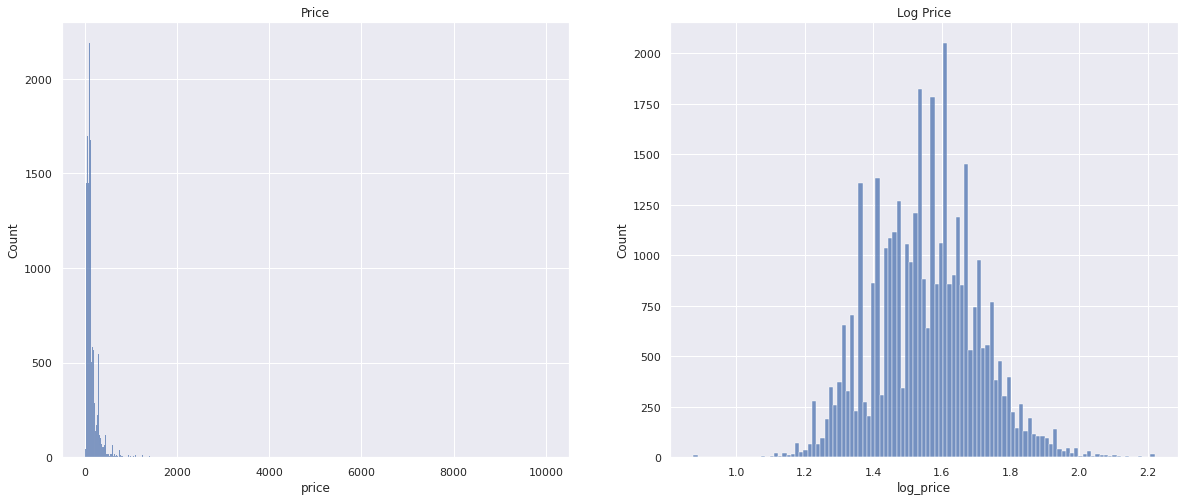

In [ ]:
#Combined Visual of Price and Log Price
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(df['price'], ax=ax1).set_title("Price")
sns.set(font_scale=1)
ax1.grid(True)
ax2.grid(True)
sns.histplot(np.log(df['log_price']),ax=ax2).set_title("Log Price")

plt.show()

##Addition of new binary columns - to capture the presence of nulls in original columns

In [ ]:
df['host_since_1'] = np.where(df['host_since'].isnull(), '0', '1')
df['host_is_superhost_1'] = np.where(df['host_is_superhost'].isnull(), '0', '1')
df['host_total_listings_count_1'] = np.where(df['host_total_listings_count'].isnull(), '0', '1')
df['host_has_profile_pic_1'] = np.where(df['host_has_profile_pic'].isnull(), '0', '1')
df['host_identity_verified_1'] = np.where(df['host_identity_verified'].isnull(), '0', '1')
df['bathrooms_1'] = np.where(df['bathrooms'].isnull(), '0', '1')
df['bedrooms_1'] = np.where(df['bedrooms'].isnull(), '0', '1')
df['beds_1'] = np.where(df['beds'].isnull(), '0', '1')
df['first_review_1'] = np.where(df['first_review'].isnull(), '0', '1')
df['last_review_1'] = np.where(df['last_review'].isnull(), '0', '1')
df['review_scores_rating_1'] = np.where(df['review_scores_rating'].isnull(), '0', '1')
df['review_scores_accuracy_1'] = np.where(df['review_scores_accuracy'].isnull(), '0', '1')
df['review_scores_cleanliness_1'] = np.where(df['review_scores_cleanliness'].isnull(), '0', '1')
df['review_scores_checkin_1'] = np.where(df['review_scores_checkin'].isnull(), '0', '1')
df['review_scores_communication_1'] = np.where(df['review_scores_communication'].isnull(), '0', '1')
df['review_scores_location_1'] = np.where(df['review_scores_location'].isnull(), '0', '1')
df['review_scores_value_1'] = np.where(df['review_scores_value'].isnull(), '0', '1')
df['reviews_per_month_1'] = np.where(df['reviews_per_month'].isnull(), '0', '1')

##Date Column Modification for Regression Analysis

Transforming date columns to 'datetime' format and further convert them to ordinal numbers, counting number of days from 01/01/2000.

In [ ]:
from datetime import datetime
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format =True, errors = 'coerce')
df['first_review'] = pd.to_datetime(df['first_review'], infer_datetime_format =True, errors = 'coerce')
df['host_since'] = pd.to_datetime(df['host_since'], infer_datetime_format =True, errors = 'coerce')

In [ ]:
#creating columns stating "number of days since Jan-01-2000 until that specific date"
df['last_review_days'] = (df['last_review'] - pd.Timestamp('2000-01-01')).dt.days
df['first_review_days'] = (df['first_review'] - pd.Timestamp('2000-01-01')).dt.days
df['host_since_days'] = (df['host_since'] - pd.Timestamp('2000-01-01')).dt.days

##Creating a new variable to measure distance from the Empire State building, instead of using just the coordinates

In [ ]:
!pip install haversine
import haversine as hs
es_loc = (40.748817, -73.985428)
df['distance_from_empire_state']=df[['latitude', 'longitude']].apply(lambda x:hs.haversine((x.latitude, x.longitude), es_loc), axis=1)
df[['distance_from_empire_state', 'latitude', 'longitude']].head(2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,distance_from_empire_state,latitude,longitude
0,0.527575,40.75356,-73.98559
1,7.478683,40.68494,-73.95765


In [ ]:
df.shape

(38277, 64)

# Preprocessing for Machine Learning

In [ ]:
#splitting to train and test data 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((30621, 64), (7656, 64))

In [ ]:
listings = train_set.drop("log_price", axis=1)  # predictors
listings_prices = train_set["log_price"].copy() # target

Building a pipeline that will be used for preprocessing and feature selection 

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

set_config(display='diagram') # graphically shows the pipeline when printed

num_attribs = ['host_total_listings_count', 'latitude', 'longitude',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','calculated_host_listings_count',
       'reviews_per_month', 'first_review_days', 'last_review_days', 'host_since_days','distance_from_empire_state',
      
]
cat_attribs = ['neighbourhood_group',
                'property_type', 'room_type', 'bathrooms', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable',]

def_attribs = [ 'host_since_1', 'host_is_superhost_1', 'host_total_listings_count_1',
       'host_has_profile_pic_1', 'host_identity_verified_1', 'bathrooms_1',
       'bedrooms_1', 'beds_1', 'first_review_1', 'last_review_1',
       'review_scores_rating_1', 'review_scores_accuracy_1',
       'review_scores_cleanliness_1', 'review_scores_checkin_1',
       'review_scores_communication_1', 'review_scores_location_1',
       'review_scores_value_1', 'reviews_per_month_1',
    ]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ("def", 'passthrough', def_attribs),
])
preprocess_pipeline = Pipeline([   #for feature selection
    ('prep', preprocessing),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0))])

listings_prepared = preprocess_pipeline.fit_transform(listings)

Patching the needed code to get feature names out of the pipeline

In [ ]:


def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler
    from sklearn.impute import IterativeImputer
    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out
    
    if not hasattr(IterativeImputer, "get_feature_names_out"):
      print("Monkey-patching IterativeImputer.get_feature_names_out()")
      IterativeImputer.get_feature_names_out = default_get_feature_names_out

monkey_patch_get_signature_names_out()

Creating a dataframe from the pipeline 

In [ ]:

df_listings_prepared = pd.DataFrame(
    listings_prepared, columns=preprocessing.get_feature_names_out())
df_listings_prepared.set_index(listings.index)
df_listings_prepared.head(5)

,num__host_total_listings_count,num__latitude,num__longitude,num__accommodates,num__bedrooms,num__beds,num__minimum_nights,num__maximum_nights,num__availability_365,num__number_of_reviews,...,def__first_review_1,def__last_review_1,def__review_scores_rating_1,def__review_scores_accuracy_1,def__review_scores_cleanliness_1,def__review_scores_checkin_1,def__review_scores_communication_1,def__review_scores_location_1,def__review_scores_value_1,def__reviews_per_month_1
0,-0.152088,1.283576,-0.300932,-0.421857,-0.425265,-0.527588,0.290306,-0.005782,-0.939855,-0.38161,...,1,1,1,1,1,1,1,1,1,1
1,-0.152088,-0.392301,-1.130065,0.649083,-0.425265,-0.527588,0.290306,-0.005782,-0.939855,-0.461923,...,0,0,0,0,0,0,0,0,0,0
2,-0.155309,0.578473,-0.502814,-1.492797,-0.425265,-0.527588,-0.714557,-0.005844,-0.939855,-0.461923,...,0,0,0,0,0,0,0,0,0,0
3,-0.129546,-0.684898,0.312768,-0.421857,-0.425265,-0.527588,-0.679906,-0.005871,1.42635,0.782921,...,1,1,1,1,1,1,1,1,1,1
4,-0.155309,-0.78237,0.627376,-0.421857,-0.425265,-0.527588,-0.714557,-0.005873,-0.402398,-0.140673,...,1,1,1,1,1,1,1,1,1,1


#Feature Selection - using GridSearch to find optimal number of features for prediction

Using a small part of the data for feature selection. 

We picked 1000 random entries to do feature selection and to minimise the runtime. (as the runtime was originally longer due to the significantly large size of the dataset)


In [ ]:
x = listings.sample(n = 1000, random_state = 2)
y = listings_prices.sample(n = 1000, random_state = 2)

In [ ]:
from sklearn.model_selection import cross_val_score
lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
lin_reg.fit(x,y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['host_total_listings_count',
                                                                    'latitude',
                                                                    'longitude',
                                                                    'accommodates',
                                                                    'bedrooms',
                                                                    'beds',
                                                                    'minimum_nights',
                                                                    'maximum_nights',
                                                                    'availability_365',
                                                                    'number_of_reviews',
                                                                    'number_of_...
                                                                    'review_scores_rating_1',
                                                                    'review_scores_accuracy_1',
                                                                    'review_scores_cleanliness_1',
                                                                    'review_scores_checkin_1',
                                                                    'review_scores_communication_1',
                                                                    'review_scores_location_1',
                                                                    'review_scores_value_1',
                                                                    'reviews_per_month_1'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('linearregression', LinearRegression())])

Implementing GridSearch method for forward feature selection

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = ({
    'pipeline__select__n_features_to_select': np.arange(1, 21, 1) #looking to reduce number of features to no more than 20 columns
})

grid_search = GridSearchCV(lin_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(x, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('prep',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('impute',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['host_total_listings_count',
                                                                                           'latitude',
                                                                                           'longitude',
                                                                                           'accommodates',
                                                                                           'bedrooms',
                                                                                           'beds',
                                                                                           'minimum_nights',
                                                                                           'maximum_nights',
                                                                                           'availability_365',
                                                                                           'nu...
                                                                                           'review_scores_location_1',
                                                                                           'review_scores_value_1',
                                                                                           'reviews_per_month_1'])])),
                                                        ('select',
                                                         SequentialFeatureSelector(estimator=LinearRegression(),
                                                                                   n_features_to_select=1.0))])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pipeline__select__n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_root_mean_squared_error')

Checking the results

In [ ]:

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,10.579859,0.182768,0.013585,0.001003,16,{'pipeline__select__n_features_to_select': 16},-0.453659,-0.556401,-0.485522,-0.498527,0.042941,1
16,11.318614,0.267291,0.013427,0.001495,17,{'pipeline__select__n_features_to_select': 17},-0.454840,-0.561490,-0.485361,-0.500564,0.044847,2
14,9.760745,0.211129,0.014048,0.001682,15,{'pipeline__select__n_features_to_select': 15},-0.460575,-0.558264,-0.488470,-0.502436,0.041086,3
17,12.661472,0.637722,0.012874,0.001039,18,{'pipeline__select__n_features_to_select': 18},-0.458550,-0.565105,-0.485427,-0.503027,0.045246,4
18,13.030922,0.283405,0.013508,0.001257,19,{'pipeline__select__n_features_to_select': 19},-0.469748,-0.564767,-0.484692,-0.506402,0.041719,5


The results are not very decisive, as the top 5 scores are similar to each other; hence we will proceed with the number of features with the lowest mean test score

We can assume that, using more columns would, on average, result in better training scores, given that our top-5 scores came mostly from the 5 highest number of features in the given range.

However, to reduce the chances of overfitting and lower computing time, we will continue the analysis with the chosen 16 features.

In [ ]:
print(grid_search.best_params_) # Number of columns that were kept
print('Grid search RMSE score: {:.2f}'.format(-grid_search.best_score_)) # RMSE obtained
names_in = grid_search.best_estimator_['pipeline']['prep'].get_feature_names_out()
selected_index = grid_search.best_estimator_['pipeline']['select'].support_
print('The selected columns are ', names_in[selected_index])  # The columns that were kept

{'pipeline__select__n_features_to_select': 16}
Grid search RMSE score: 0.50
The selected columns are  ['num__host_total_listings_count' 'num__latitude' 'num__accommodates'
 'num__availability_365' 'num__review_scores_cleanliness'
 'num__calculated_host_listings_count' 'num__distance_from_empire_state'
 'cat__neighbourhood_group_Manhattan'
 'cat__property_type_Entire rental unit'
 'cat__property_type_Room in boutique hotel'
 'cat__property_type_Room in hotel' 'cat__room_type_Entire home/apt'
 'cat__bathrooms_1 private bath' 'cat__bathrooms_2 baths'
 'cat__bathrooms_2.5 baths' 'def__bedrooms_1']


In [ ]:
a = list(names_in[selected_index])
a

['num__host_total_listings_count',
 'num__latitude',
 'num__accommodates',
 'num__availability_365',
 'num__review_scores_cleanliness',
 'num__calculated_host_listings_count',
 'num__distance_from_empire_state',
 'cat__neighbourhood_group_Manhattan',
 'cat__property_type_Entire rental unit',
 'cat__property_type_Room in boutique hotel',
 'cat__property_type_Room in hotel',
 'cat__room_type_Entire home/apt',
 'cat__bathrooms_1 private bath',
 'cat__bathrooms_2 baths',
 'cat__bathrooms_2.5 baths',
 'def__bedrooms_1']

##Creating a new (reduced) DataFrame using only the selected features

In [ ]:
original_selected_features = ['host_total_listings_count', 'latitude', 'accommodates', 'availability_365', 'review_scores_cleanliness', 'calculated_host_listings_count',
                              'distance_from_empire_state', 'neighbourhood_group', 'property_type', 'room_type', 'bathrooms','bathrooms_1']
listings_selected = listings[original_selected_features]
listings_selected.head(3)

,host_total_listings_count,latitude,accommodates,availability_365,review_scores_cleanliness,calculated_host_listings_count,distance_from_empire_state,neighbourhood_group,property_type,room_type,bathrooms,bathrooms_1
18917,1.0,40.80068,2,0,4.5,1,6.034360,Manhattan,Entire rental unit,Entire home/apt,1 bath,1
10221,1.0,40.70732,4,0,NaN,1,4.945633,Manhattan,Entire rental unit,Entire home/apt,1 bath,1
27400,0.0,40.76140,0,0,NaN,1,1.669723,Manhattan,Room in boutique hotel,Hotel room,NaN,0


# Exploring feature selection using regularization
####We will use Lasso linear regressions on the original data (all features) and compare the performance with our feature selection

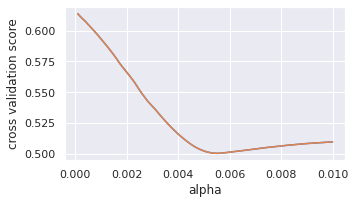

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

#searching for optimal alpha parameter using CV
alphas = np.linspace(0.0001, 0.01, num=100)

plt.figure(figsize=(5, 3))
# for Model in [Lasso, Ridge]:
scores = [-cross_val_score(make_pipeline(preprocessing, Lasso(alpha=a)), listings, listings_prices, scoring='neg_root_mean_squared_error',cv=3).mean()
            for a in alphas]
plt.plot(alphas, scores, label='Lasso')
# scores = [-cross_val_score(make_pipeline(preprocessing, Lasso(alpha=a)), listings, listings_prices, scoring='neg_root_mean_squared_error',cv=3).mean() for a in alphas]
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [ ]:
index = scores.index(min(scores))
best_alpha = round(alphas[index],4)
print('Best alpha found: {}, Best rmse score: {}'.format(best_alpha, round(scores[index],4)))

Best alpha found: 0.0055, Best rmse score: 0.5003


Using best alpha to get zero coefficients

In [ ]:
lass_reg = Lasso(alpha = best_alpha, random_state=0, selection = 'random')
lass_reg.fit(listings_prepared, listings_prices)
coeffs = pd.DataFrame({'predictor': df_listings_prepared.columns, 'coefficient': lass_reg.coef_})
zero_coeffs = coeffs.loc[coeffs['coefficient']==0]
non_zero_coeffs = coeffs.loc[coeffs['coefficient']!=0]

Checking if the zero-coefficients from the Lasso regression were in our selected features


In [ ]:
L = 0
for predictor in coeffs['predictor']:
  if predictor in names_in[selected_index]:
    L+=1
print('total number of zero coefficients is {}'.format(len(zero_coeffs)))
print('total number of non-zero coefficients is {}'.format(len(non_zero_coeffs)))

L1=0
for predictor in non_zero_coeffs['predictor']:
  if predictor in names_in[selected_index]:
    L1+=1
print('Out of the {} non_zero variables in the Lasso regression, {} variables appear in the list of 16 selected features.'.format(len(non_zero_coeffs),L1,))

total number of zero coefficients is 129
total number of non-zero coefficients is 36
Out of the 36 non_zero variables in the Lasso regression, 14 variables appear in the list of 16 selected features.


In [ ]:
M0 = list(names_in[selected_index])
M1 = list(non_zero_coeffs['predictor'])

overlap=[]
different=[]
for i in M0:
  if i in M1:
    overlap.append(i)
  else:
    different.append(i)

print('Of the 16 features chosen in feature selection, overlapping are: {} '.format(overlap))
print('The variables that the Lasso regression removed are: {}'.format(different))

Of the 16 features chosen in feature selection, overlapping are: ['num__host_total_listings_count', 'num__latitude', 'num__accommodates', 'num__availability_365', 'num__review_scores_cleanliness', 'num__calculated_host_listings_count', 'num__distance_from_empire_state', 'cat__neighbourhood_group_Manhattan', 'cat__property_type_Entire rental unit', 'cat__property_type_Room in hotel', 'cat__room_type_Entire home/apt', 'cat__bathrooms_1 private bath', 'cat__bathrooms_2 baths', 'def__bedrooms_1'] 
The variables that the Lasso regression removed are: ['cat__property_type_Room in boutique hotel', 'cat__bathrooms_2.5 baths']


# Pipeline update for prediction models with reduced columns

In [ ]:
original_selected_features

['host_total_listings_count',
 'latitude',
 'accommodates',
 'availability_365',
 'review_scores_cleanliness',
 'calculated_host_listings_count',
 'distance_from_empire_state',
 'neighbourhood_group',
 'property_type',
 'room_type',
 'bathrooms',
 'bathrooms_1']

In [ ]:
#new pipeline
nums = ['host_total_listings_count','accommodates','availability_365','distance_from_empire_state', 'latitude', 
      'review_scores_cleanliness',  'calculated_host_listings_count']
      
cats = [ 'neighbourhood_group', 'property_type', 'room_type', 'bathrooms']
    
defs = ['bathrooms_1']

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

prep = ColumnTransformer([
    ("num", num_pipeline, nums),
    ("cat", cat_pipeline, cats),
    ("def", 'passthrough', defs)
])

In [ ]:
listings_selected_prepared = prep.fit_transform(listings_selected)

df_selected_prepared = pd.DataFrame.sparse.from_spmatrix(listings_selected_prepared, columns=prep.get_feature_names_out())

df_selected_prepared.columns=prep.get_feature_names_out()
df_selected_prepared.set_index(listings.index)
df_selected_prepared.head(5)

,num__host_total_listings_count,num__accommodates,num__availability_365,num__distance_from_empire_state,num__latitude,num__review_scores_cleanliness,num__calculated_host_listings_count,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,...,cat__bathrooms_6 baths,cat__bathrooms_6 shared baths,cat__bathrooms_6.5 baths,cat__bathrooms_7 baths,cat__bathrooms_7.5 baths,cat__bathrooms_8 baths,cat__bathrooms_Half-bath,cat__bathrooms_Private half-bath,cat__bathrooms_Shared half-bath,def__bathrooms_1
0,-0.152088,-0.421857,-0.939855,-0.203817,1.283576,-0.327732,-0.281265,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.152088,0.649083,-0.939855,-0.435514,-0.392301,0.276241,-0.281265,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.155309,-1.492797,-0.939855,-1.132675,0.578473,0.276241,-0.281265,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.129546,-0.421857,1.426350,0.170924,-0.684898,0.356771,-0.196575,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.155309,-0.421857,-0.402398,0.446478,-0.782370,-0.066010,-0.230451,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Prediction Models - Comparison

We will compare the Root Mean Square Error of three predictive models: Linear Regression, Decision Tree, and Random Forest. 

Since linear regression was already used for feature selection, we will not use it later, but we will use it now for comparing purposes.

Linear Regression

In [ ]:
#first attempt for comparison - Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = make_pipeline(prep, LinearRegression())
lin_test_rmses = -cross_val_score(lin_reg, listings_selected, listings_prices,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Linear regression cross validation error: {:.5f}'.format(lin_test_rmses.mean()))

Linear regression cross validation error: 0.48728


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(prep, DecisionTreeRegressor(random_state=42))
tree_rmses = -cross_val_score(tree_reg, listings_selected, listings_prices,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Decision tree cross validation error: {:.5f}'.format(tree_rmses.mean()))

Decision tree cross validation error: 0.59075


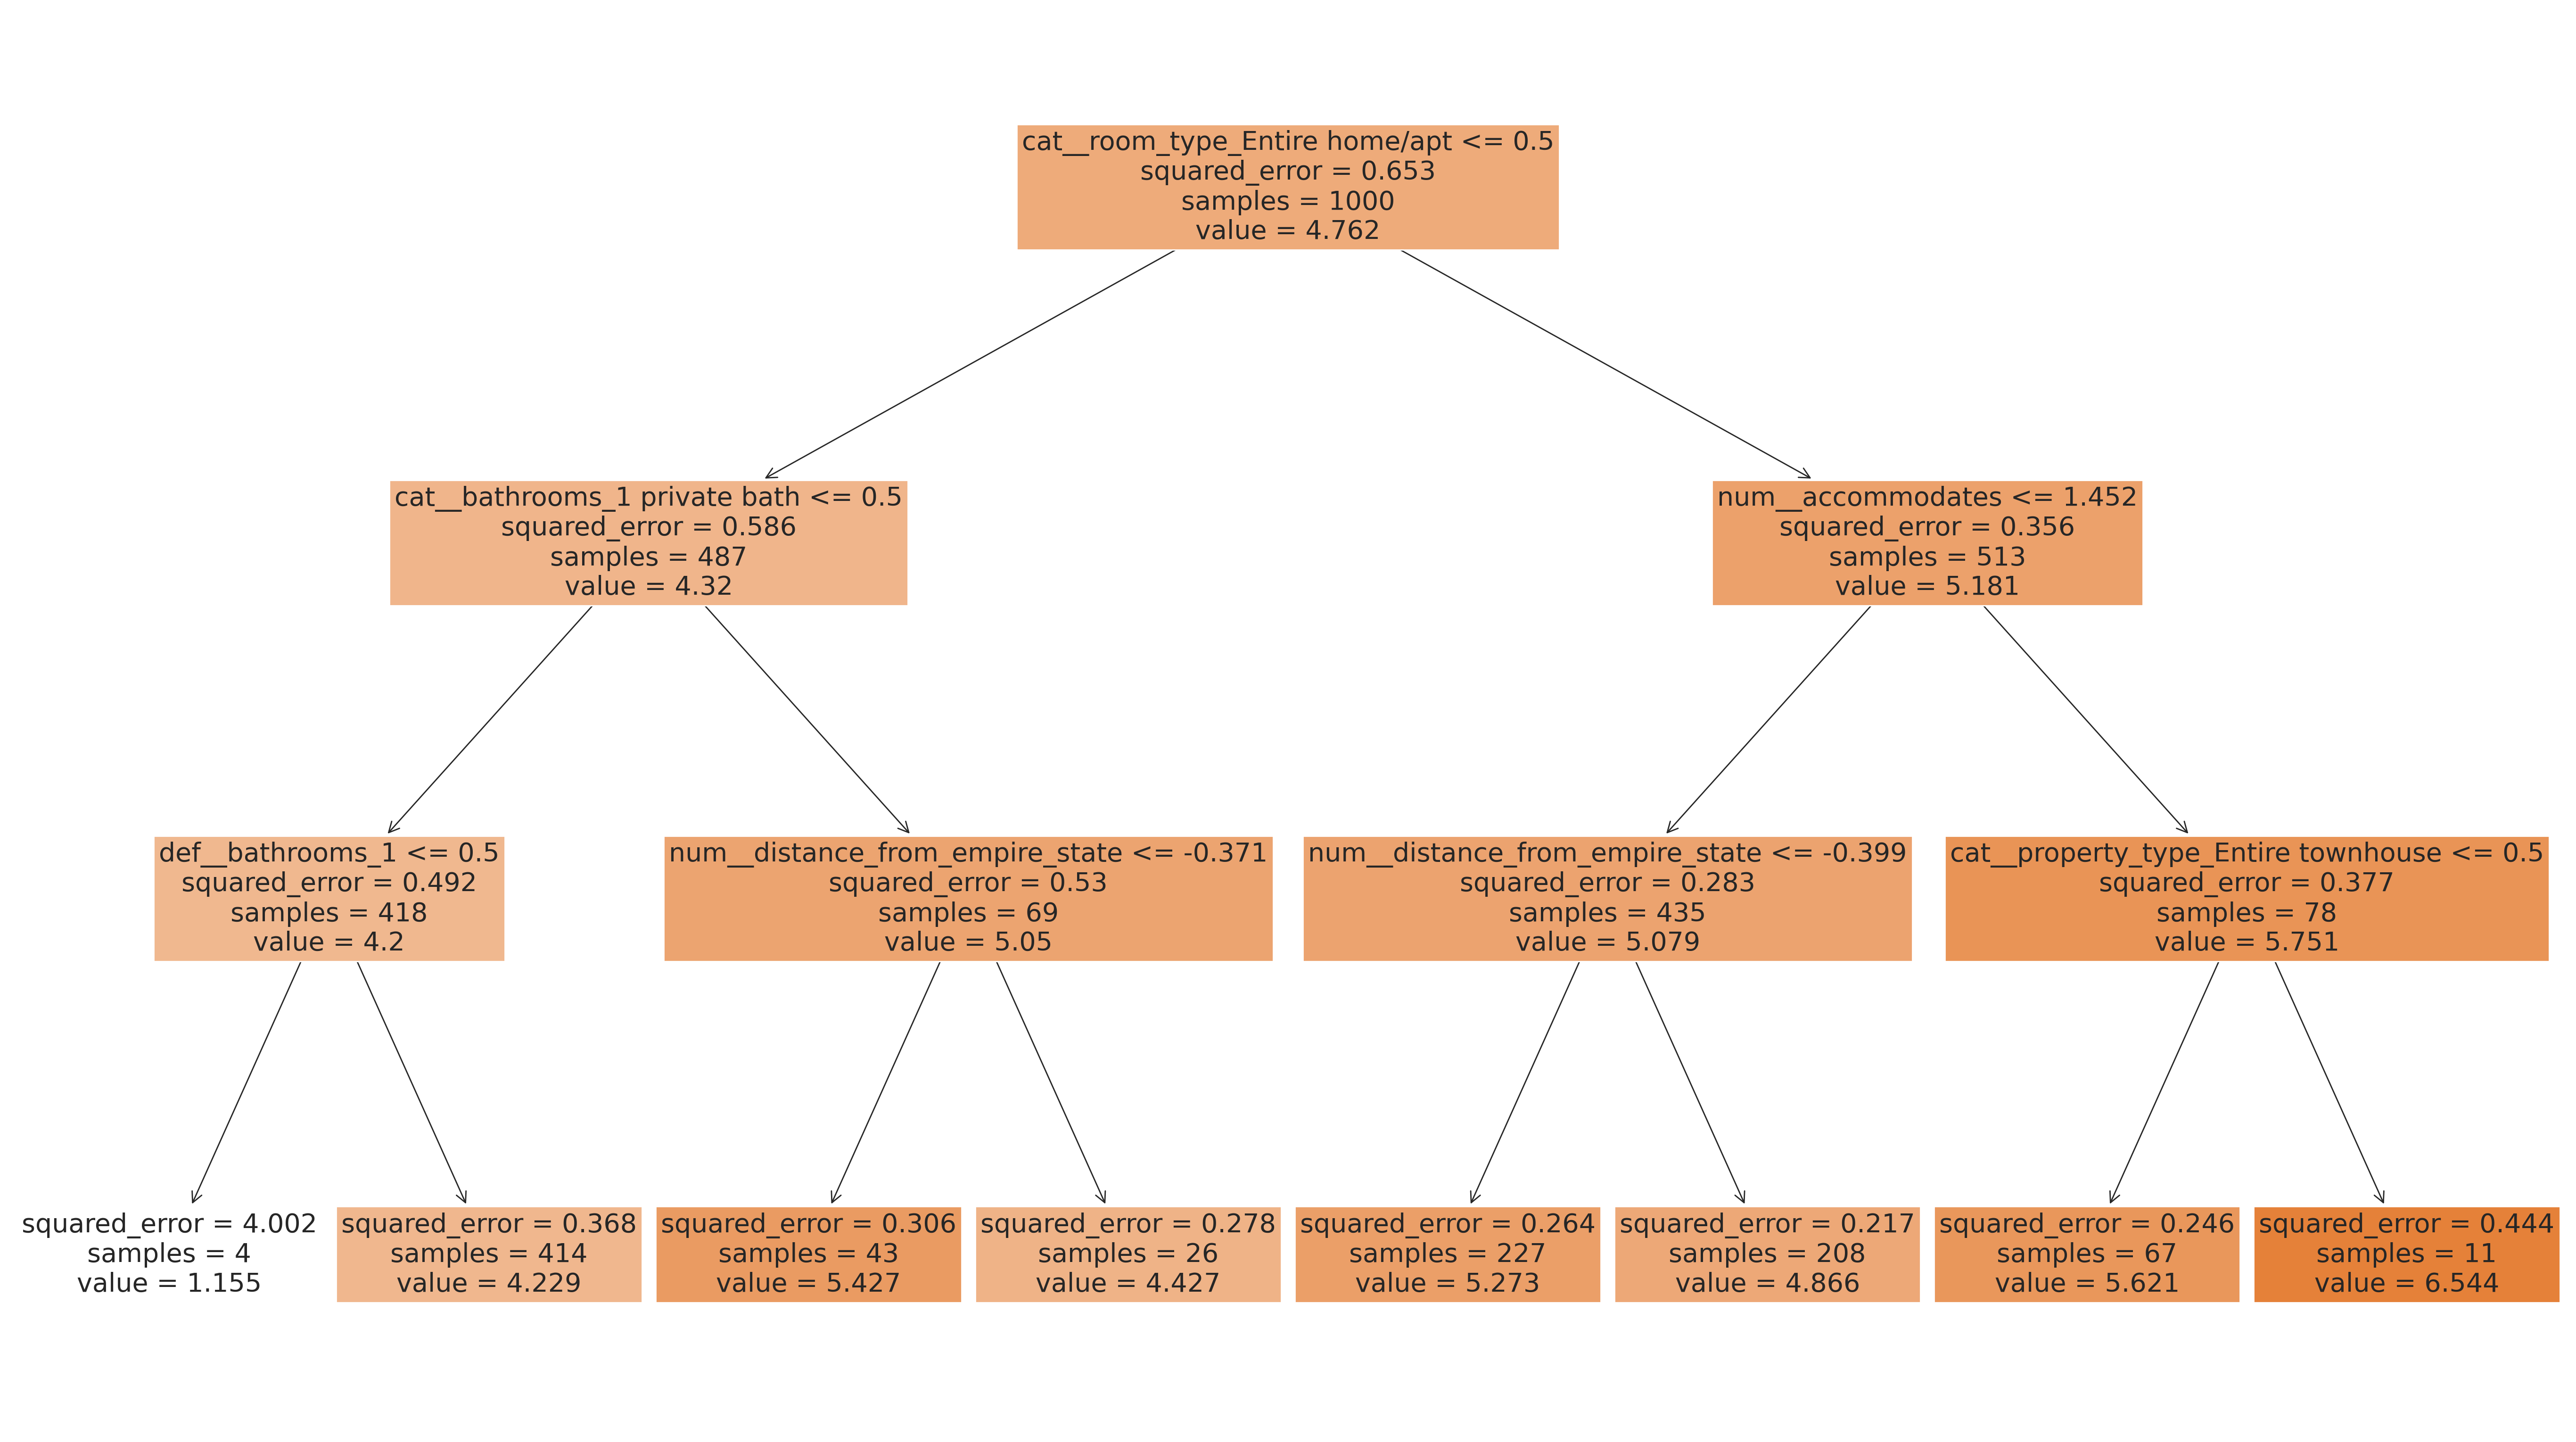

In [ ]:
# for visualizing - use only 3 layers
tree_reg_2 = DecisionTreeRegressor(random_state=42, max_depth=3)
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree_reg_2.fit(df_selected_prepared.head(1000), listings_prices.head(1000)) 
plt.figure(dpi=200, figsize = (35,20))
plot_tree(tree_reg_2, filled=True, feature_names = list(df_selected_prepared.columns), fontsize=20); # graphically shows the tree

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(prep,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, listings_selected, listings_prices,
                                scoring="neg_root_mean_squared_error", cv=3)
forest_rmses.mean()

0.43033218983184734

In [ ]:
results = { 'linear Regression': lin_test_rmses.mean(), 'decision tree': tree_rmses.mean(), 'random forest': forest_rmses.mean()}
best_result = round(min(results.values()),3)
best_result_model = min(results, key=results.get)
print("model with the lowest error : {}, rmse = {}".format(best_result_model, best_result))

print("the median price in the train data is {0} and that tranlates to log1p(price) of {1}".format(round(train_set['price'].median(),2), round(np.log1p(train_set['price'].median()),2) ))
print("the best mean squared error is of {} of the median log_price, or {} dollar difference to the median price".format(round(best_result/train_set['log_price'].median(),2), round(np.exp(train_set['log_price'].median()-best_result)-np.exp(train_set['log_price'].median()),2)))

model with the lowest error : random forest, rmse = 0.43
the median price in the train data is 114.0 and that tranlates to log1p(price) of 4.74
the best mean squared error is of 0.09 of the median log_price, or -39.99 dollar difference to the median price


Based on the results above, We find Random forest method to be generating the lowest error. Hence proceeding with the method - Random forest

#Hyper Parameter Tuning


Using Halving Random Search to identify optimal hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

full_pipeline = Pipeline([
    ('preprocessing', prep),
    ('random_forest', RandomForestRegressor(random_state=42)),
])

param_distribs = {'random_forest__max_features': [10,15,20],
                  'random_forest__max_depth': [5,10,15],
                  'random_forest__n_estimators': [10, 15, 20],
                  'random_forest__min_samples_leaf': [1, 2, 3]
                  }

halving_random_search = HalvingRandomSearchCV(full_pipeline,param_distribs,
                                      n_candidates=50, cv=3,
                                      min_resources='exhaust',
                                      scoring='neg_root_mean_squared_error', 
                                      random_state=42)

halving_random_search.fit(listings_selected, listings_prices)
# halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
print(halving_random_search.best_params_)
halving_random_cv_res.head(5)

{'random_forest__n_estimators': 20, 'random_forest__min_samples_leaf': 2, 'random_forest__max_features': 20, 'random_forest__max_depth': 15}


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
73,3,30618,1.897382,0.024617,0.059111,0.002574,20,2,20,15,...,-0.430878,-0.439107,-0.433980,0.003652,1,-0.374385,-0.371546,-0.367390,-0.371107,0.002873
74,3,30618,1.983315,0.075780,0.060119,0.003028,20,1,15,15,...,-0.433296,-0.443111,-0.435123,0.005920,2,-0.360009,-0.357117,-0.361754,-0.359627,0.001912
71,2,10206,0.601063,0.012311,0.026068,0.001156,20,1,15,15,...,-0.460980,-0.457730,-0.454040,0.007633,3,-0.310512,-0.309171,-0.299620,-0.306434,0.004849
70,2,10206,0.546941,0.003821,0.025842,0.000318,20,2,20,15,...,-0.458605,-0.453481,-0.455106,0.002476,4,-0.343931,-0.343836,-0.340241,-0.342669,0.001718
67,2,10206,0.458318,0.009596,0.023189,0.000973,15,1,15,15,...,-0.462945,-0.459106,-0.455769,0.007597,5,-0.315603,-0.311745,-0.301260,-0.309536,0.006060


# Running the selected model on test data

In [ ]:
halving_random_search.best_params_

{'random_forest__n_estimators': 20,
 'random_forest__min_samples_leaf': 2,
 'random_forest__max_features': 20,
 'random_forest__max_depth': 15}

Using the parameters found to estimate the errors

In [ ]:
# test = test_set.drop("log_price", axis=1)  # predictors
test_listings = test_set[original_selected_features]
test_listings_prices = test_set["log_price"].copy() # target

forest = make_pipeline(prep, RandomForestRegressor(max_features=halving_random_search.best_params_['random_forest__max_features'], max_depth=halving_random_search.best_params_['random_forest__max_depth'],n_estimators=halving_random_search.best_params_['random_forest__n_estimators'],min_samples_leaf=halving_random_search.best_params_['random_forest__min_samples_leaf'], random_state=0))
forest.fit(listings_selected, listings_prices)
y_pred = forest.predict(test_listings)
rmse_test = (mean_squared_error(test_listings_prices, y_pred))**.5
print(rmse_test)

0.43128075337794114


In [ ]:
print("the median price in the data is {0} and that tranlates to log1p(price) of {1}".format(round(test_set['price'].median(),2), round(np.log1p(test_set['price'].median()),2) ))
print("the mean squared error is of {} of the median log_price, or {} dollar difference to the median price".format(round(rmse_test/test_set['log_price'].median(),2), round(np.exp(test_set['log_price'].median()-rmse_test)-np.exp(test_set['log_price'].median()),2)))

the median price in the data is 115.0 and that tranlates to log1p(price) of 4.75
the mean squared error is of 0.09 of the median log_price, or -40.49 dollar difference to the median price


#Appendix - Feature Exploration

####Adding new binary columns indicating top 10 keywords used in the column '*name*'

In [ ]:
# Finding most common keywords for 'name' column

name_count = df.name.str.split().explode().value_counts()
name_count.head(5)

in         12030
Room        4061
Private     3875
Bedroom     3105
room        2987
Name: name, dtype: int64

In [ ]:
# Finding the most appropriate keywords for the 'name' column 

new = name_count.to_frame()
new.reset_index()
new.columns = ["count"]
new.reset_index(inplace=True)
new.columns = ["type", "count"]

new.loc[new['type'].isin(["Private", "Cozy", "Room", "Spacious", "Beautiful", "Sunny", "New", "Modern", "Luxury", "heart"])]

,type,count
1,Room,4061
2,Private,3875
6,Cozy,2850
18,Spacious,2073
24,Beautiful,1555
30,Sunny,1233
34,New,1129
36,Modern,1102
39,Luxury,1010
42,heart,879


In [ ]:
# Adding new columns for the top 10 common keywords for 'name' column
df1= df.copy()
word_1  = ['private']
df1['has_private'] = np.where(df1['name'].str.contains('|'.join(word_1), case=False, na=False), 1, 0)
word_2  = ['Room']
df1['has_Room'] = np.where(df1['name'].str.contains('|'.join(word_2), case=False, na=False), 1, 0)
word_3  = ['Cozy']
df1['has_Cozy'] = np.where(df1['name'].str.contains('|'.join(word_3), case=False, na=False), 1, 0)
word_4  = ['Spacious']
df1['has_Spacious'] = np.where(df1['name'].str.contains('|'.join(word_4), case=False, na=False), 1, 0)
word_5  = ['Beautiful']
df1['has_Beautiful'] = np.where(df1['name'].str.contains('|'.join(word_5), case=False, na=False), 1, 0)
word_6  = ['Sunny']
df1['has_Sunny'] = np.where(df1['name'].str.contains('|'.join(word_6), case=False, na=False), 1, 0)
word_7  = ['New']
df1['has_New'] = np.where(df1['name'].str.contains('|'.join(word_7), case=False, na=False), 1, 0)
word_8  = ['Modern']
df1['has_Modern'] = np.where(df1['name'].str.contains('|'.join(word_8), case=False, na=False), 1, 0)
word_9  = ['Luxury']
df1['has_Luxury'] = np.where(df1['name'].str.contains('|'.join(word_9), case=False, na=False), 1, 0)
word_10  = ['heart']
df1['has_heart'] = np.where(df1['name'].str.contains('|'.join(word_10), case=False, na=False), 1, 0)

####Added new binary columns indicating top 10 keywords used in column 'Amenities'

In [ ]:
# Finding most common keywords for 'amenities' column

amenities_count = df.amenities.str.split().explode().value_counts()
amenities_count.head(10)

alarm",       61862
allowed",     40538
"Wifi",       36801
stays         35079
term          35079
"Long         34498
"Smoke        33747
"Heating",    32931
and           31766
"Air          30220
Name: amenities, dtype: int64

In [ ]:
# Adding new columns for the top 10 common keywords for 'amenities' column

key_1  = ['alarm']
df1['has_alarm'] = np.where(df1['amenities'].str.contains('|'.join(key_1), case=False, na=False), 1, 0)
key_2  = ['wifi']
df1['has_wifi'] = np.where(df1['amenities'].str.contains('|'.join(key_2), case=False, na=False), 1, 0)
key_3  = ['smoke']
df1['has_smoke'] = np.where(df1['amenities'].str.contains('|'.join(key_3), case=False, na=False), 1, 0)
key_4  = ['Heating']
df1['has_Heating'] = np.where(df1['amenities'].str.contains('|'.join(key_4), case=False, na=False), 1, 0)
key_5  = ['Air Conditioning']
df1['has_AC'] = np.where(df1['amenities'].str.contains('|'.join(key_5), case=False, na=False), 1, 0)
key_6  = ['Kitchen']
df1['has_Kitchen'] = np.where(df1['amenities'].str.contains('|'.join(key_6), case=False, na=False), 1, 0)
key_7  = ['hot']
df1['has_hot'] = np.where(df1['amenities'].str.contains('|'.join(key_7), case=False, na=False), 1, 0)
key_8  = ['dedicated']
df1['has_dedicated'] = np.where(df1['amenities'].str.contains('|'.join(key_8), case=False, na=False), 1, 0)
key_9  = ['dryer']
df1['has_dryer'] = np.where(df1['amenities'].str.contains('|'.join(key_9), case=False, na=False), 1, 0)
key_10  = ['Iron']
df1['has_Iron'] = np.where(df1['amenities'].str.contains('|'.join(key_10), case=False, na=False), 1, 0)

####Log Price and top 10 keywords for 'name' column and other columns

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
est = smf.ols('log_price ~ (has_private)+has_Room+has_Cozy+has_Spacious+has_Beautiful+has_Sunny+has_New+has_Modern+has_Luxury+has_heart+accommodates*bedrooms+minimum_nights+I(neighbourhood_group)+room_type+bathrooms+review_scores_rating+reviews_per_month',df1).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     733.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:31:15   Log-Likelihood:                -16485.
No. Observations:               25718   AIC:                         3.307e+04
Df Residuals:                   25666   BIC:                         3.350e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

As we can see, all of the top 10 keywords for 'name' column, except 'has_new' and 'has_sunny' columns, have a p-value of less than 0.05 and therefore there is a high probability of them being correlated with price.

The following words - 'has_room', 'has_private', 'has_cozy' and 'has_spacious' are negatively correlated with price, whereas the words - 'has_beautiful', 'has_modern', 'has_luxury' and 'has_heart' are postively correlated with price.




Further, we include the location variable (distance from the Empire State Building) to see if the word "heart"  is still significant.

In [ ]:
est = smf.ols('log_price ~ (has_private)+has_Room+has_Cozy+has_Spacious+has_Beautiful+has_Sunny+has_New+has_Modern+has_Luxury+has_heart+accommodates*bedrooms+minimum_nights+I(neighbourhood_group)+room_type+bathrooms+review_scores_rating+reviews_per_month+distance_from_empire_state',df1).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     796.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:31:15   Log-Likelihood:                -15695.
No. Observations:               25718   AIC:                         3.150e+04
Df Residuals:                   25665   BIC:                         3.193e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

As we can note, the p-value for 'has_heart' increased from 0.000 to 0.031 after including the distance from empire state building, a slight increase that weakens the significance correlation. This might indicate that the true relationship is in the listings location, rather than the words in its name.

####Log Price and top 10 keywords for 'amenities' column and other columns

In [ ]:
est = smf.ols("log_price ~ (has_alarm)+has_wifi+has_smoke+has_Heating+has_Kitchen+has_dedicated+has_hot+has_Iron+has_dryer++accommodates*bedrooms+minimum_nights+I(neighbourhood_group)+room_type+bathrooms+review_scores_rating+reviews_per_month+distance_from_empire_state",df1).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     804.8
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:31:16   Log-Likelihood:                -15766.
No. Observations:               25718   AIC:                         3.164e+04
Df Residuals:                   25666   BIC:                         3.206e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

As we can see, only a few keywords - 'has_Heating', 'has_kitchen', 'has_hot', 'has_iron' and 'has_dryer' have a p-value of less than 0.05 and therefore there is a high probability of them being correlated with price. The following words - 'has_heating' and 'has_kitchen' are negatively correlated with price, whereas the words - 'has_hot', 'has_iron' and 'has_dryer' are positively correlated with price.

#Conclusion




﻿This project aimed to predict Airbnb property prices in New York using Machine Learning models. Post key data modifications in price (log price), column drops, and data cleaning, we performed feature selection to shortlist the optimal variables that improve the predictions.  Comparing the Root mean square error of three models - Linear Regression, Decision Tree, and Random Forest, we found Random forest to be the best model, generating the lowest error in price prediction. 

Though all considered models gave us a decent cross-validation error score, it is not as low as we expected them to be. While feature selection helped our analysis via variables shortlist, the selection also surprised us by ignoring variables such as "Last_Review" and other date columns, originally assumed to be essential factors in price prediction.  

The analysis also faced challenges such as dealing with a large unprocessed dataset, leading to a tedious data cleaning process. With the complex Feature Selection, the project also faced a long run time, delaying the turnaround time of the results. In certain models such as Lasso, interpreting the result scores was challenging. 

We believe the project could be improved and would have provided higher accuracy with the inclusion of features such as image analysis. More information could be obtained if the model, in addition to generating aggregate mean error scores, could be trained to identify the efficiency of price prediction across specific regions in New York.

To conclude, working with real Airbnb data has allowed us predict the prices to a fair extent with minimal errors. But there is always scope for improvement. The team also has improved its ability in interpreting the results and understanding their relevance in the prediction, instead of merely looking at the numerical values. Hence, our project analysis provides us a great foundation/opportunity to dive deep into regional pricing prediction.